# 400_RQ2A

# _Question Two: What Vehicles are involved in the most road accidents?_

## _(A): Are newer vehicles safer than older vehicles?_
We return to part A of our second research question in this notebook and finalise our analysis of whether newer vehicles are safer than older vehicles.
The data being used to answer this question ranges between the years 1993-2016.

## Notebook Contents:
* __1:__ Some Matplotlib Configuration
   
* __2:__ Loading the Data

* __3:__ Are older vehicles in more accidents?

* __4:__ Are there more casualties in older vehicles?
     
* __5:__ Are accidents more severe in older vehicles?

* __6:__ Are newer vehicles safer in rainy weather conditions?

* __7:__ How did the introduction of modern technologies influence road safety?
    * __7.1:__ Airbags
    * __7.2:__ AEB Brakes
    
* __8:__ Conclusions: Are newer vehicles safer than older vehicles?


## Datasets
__Input:__ 
* 400_Analysis_Q2A_All_Num_Accidents.pkl   (Number of accidents for ages of vehicles)
* 400_Analysis_Q2A_All_less_than_or_equal_2004.pkl   (Number of accidents for ages of vehicles 1993-2004)
* 400_Analysis_Q2A_All_greater_than_or_equal_2005.pkl   (Number of accidents for ages of vehicles 2005-2016) 
* 400_Analysis_Q2A_All_number_of_Casualties.pkl   (Average number of casualties for all vehicle ages)
* 400_Analysis_Q2A_norm_All_Accident_Severity_groups.pkl   (Number of fatal, serious and slight accidents for all vehicle ages)
* 400_Analysis_Q2A_norm_All_weather_conditions_groups.pkl   (Normalised number of accidents in the different recorded weather conditions for all vehicle ages)
* 400_Analysis_Q2A_max_fatal.pkl   (Age of vehicle in the weather condition with the most fatal accidents)
* 400_Analysis_Q2A_max_serious.pkl   (Age of the vehicle in the weather condition with the most serious accidents)
* 400_Analysis_Q2A_max_slight.pkl   (Age of the vehicle in the weather condition with the most slight accidents)
* 400_Analysis_Q2A_rain_analysis_all.pkl   (All the data related to rainy weather conditions)
* 400_Analysis_Q2A_all_num_accidents_groups.pkl   (Number of accidents in each year)
* 400_Analysis_Q2A_All_Accident_Severity_airbags.pkl   (Airbags severity analysis)
* 400_Analysis_Q2A_sub_All_Accident_Severity_airbags.pkl   (Airbags severity analysis – years surrounding when airbags became compulsory)
* 400_Analysis_Q2A_All_Accident_Severity_AEB.pkl   (AEB brakes analysis)
* 400_Analysis_Q2A_sub_All_Accident_Severity_AEB.pkl   (AEB brakes severity analysis – years around when they were introduced)


__Output:__ n/a

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

% matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 1. Some Matplotlib Configuration

Below we have included some formatting which we want each of our plots to follow.

This template has been taken from Barry's Valencia Results Notebooks.

In [3]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, lines, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'

plt.rcParams['axes.titlesize'] = 40
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

plt.rcParams['axes.grid'] = True

plt.rcParams['lines.markersize'] = 30
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2

plt.rcParams['legend.fontsize'] = 15

# 2. Loading the Data

In [4]:
num_accidents_age_of_vehicle = pd.read_pickle('../../data/analysis/400_Analysis_Q2A_All_Num_Accidents.pkl')
num_accidents_age_of_vehicle.shape

(100, 1)

In [5]:
num_accidents_1993_2004 = pd.read_pickle('../../data/analysis/400_Analysis_Q2A_All_less_than_or_equal_2004.pkl')
num_accidents_1993_2004.shape

(86, 1)

In [6]:
num_accidents_2005_2016  = pd.read_pickle('../../data/analysis/400_Analysis_Q2A_All_greater_than_or_equal_2005.pkl')
num_accidents_2005_2016.shape

(97, 1)

In [7]:
num_casualties = pd.read_pickle('../../data/analysis/400_Analysis_Q2A_All_number_of_Casualties.pkl')
num_casualties.shape

(100, 1)

In [8]:
accident_severity = pd.read_pickle('../../data/analysis/400_Analysis_Q2A_norm_All_Accident_Severity_groups.pkl')
accident_severity.shape

(100, 3)

In [9]:
all_weather_conditions = pd.read_pickle('../../data/analysis/400_Analysis_Q2A_norm_All_weather_conditions_groups.pkl')
all_weather_conditions.shape

(431, 3)

In [10]:
weather_conditions_max_fatal = pd.read_pickle('../../data/analysis/400_Analysis_Q2A_max_fatal.pkl')
weather_conditions_max_fatal.shape

(1, 3)

In [11]:
weather_conditions_max_serious = pd.read_pickle('../../data/analysis/400_Analysis_Q2A_max_serious.pkl')
weather_conditions_max_serious.shape

(20, 3)

In [12]:
weather_conditions_max_slight = pd.read_pickle('../../data/analysis/400_Analysis_Q2A_max_slight.pkl')
weather_conditions_max_slight.shape

(95, 3)

In [13]:
all_rain_analysis = pd.read_pickle('../../data/analysis/400_Analysis_Q2A_rain_analysis_all.pkl')
all_rain_analysis.shape

(100, 6)

In [14]:
num_accidents_in_each_annual_year = pd.read_pickle('../../data/analysis/400_Analysis_Q2A_all_num_accidents_groups.pkl')
num_accidents_in_each_annual_year.shape

(24, 1)

In [15]:
airbags_accident_severity = pd.read_pickle('../../data/analysis/400_Analysis_Q2A_All_Accident_Severity_airbags.pkl')
airbags_accident_severity.shape

(24, 3)

In [16]:
sub_airbags_accident_severity = pd.read_pickle('../../data/analysis/400_Analysis_Q2A_sub_All_Accident_Severity_airbags.pkl')
sub_airbags_accident_severity.shape

(9, 3)

In [17]:
AEB_accident_severity = pd.read_pickle('../../data/analysis/400_Analysis_Q2A_All_Accident_Severity_AEB.pkl')
AEB_accident_severity.shape

(24, 3)

In [18]:
sub_AEB_accident_severity = pd.read_pickle('../../data/analysis/400_Analysis_Q2A_sub_All_Accident_Severity_AEB.pkl')
sub_AEB_accident_severity.shape

(9, 3)

# 3. Are older vehicles in more accidents?

* For this research question we are considering an "old" vehicle to be 10 years and older. 
* The graph below shows the total number of accidents for each vehicle age. 
* The data tells us that "new" vehicles are involved in a subsstantial amount more accidents than older cars with new vehicles under 10 years old reaching a high of ~500,000 accidents. 
* However, this was a very surprising result. Therefore we decided to compare the number of accidents between 1993-2004 and 2005-2016. We chose to split the years like this as many more new technologies and features have come out between 2005-2016. As a result, we expect there to be fewer accidents.

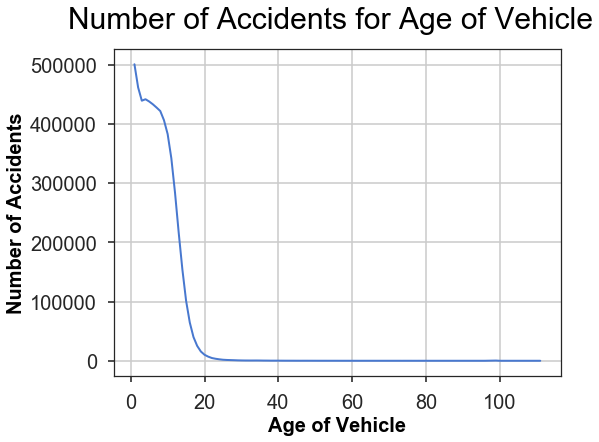

In [19]:
num_accidents_age_of_vehicle_plt = num_accidents_age_of_vehicle.plot(kind='line', legend=False, figsize=(8,6))
num_accidents_age_of_vehicle_plt.set_xlabel("Age of Vehicle")
num_accidents_age_of_vehicle_plt.set_ylabel("Number of Accidents")
plt.suptitle('Number of Accidents for Age of Vehicle', fontsize=30)
plt.show()

The graph below shows the number of accidents for each vehicle age between 1993-2004. 

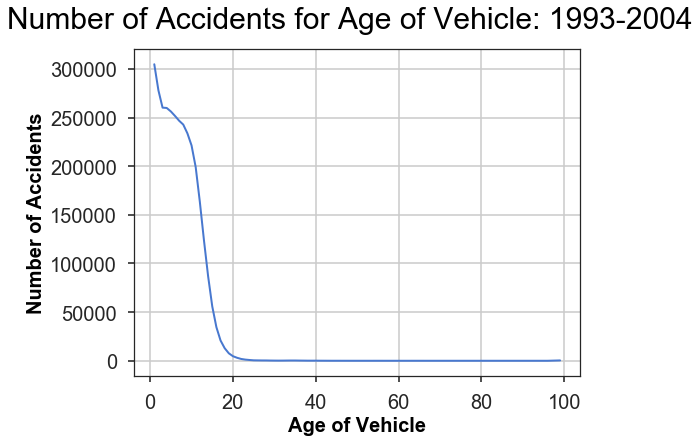

In [20]:
num_accidents_1993_2004_plt = num_accidents_1993_2004.plot(kind='line', legend=False, figsize=(8,6))
num_accidents_1993_2004_plt.set_xlabel("Age of Vehicle")
num_accidents_1993_2004_plt.set_ylabel("Number of Accidents")
plt.suptitle('Number of Accidents for Age of Vehicle: 1993-2004', fontsize=30)
plt.show()

The graph below shows the number of accidents for each vehicle age between 2005-2016. 

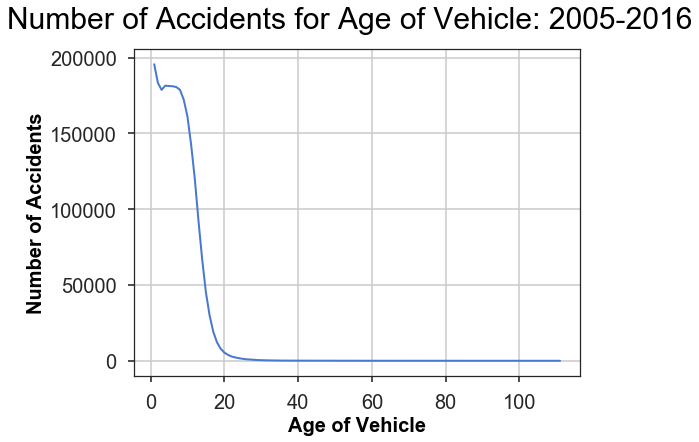

In [21]:
num_accidents_2005_2016_plt = num_accidents_2005_2016.plot(kind='line', legend=False, figsize=(8,6))
num_accidents_2005_2016_plt.set_xlabel("Age of Vehicle")
num_accidents_2005_2016_plt.set_ylabel("Number of Accidents")
plt.suptitle('Number of Accidents for Age of Vehicle: 2005-2016', fontsize=30)
plt.show()

The two graphs above still follow the same trend as the original graph with newer vehicles being involved in substantially more accidents. However, there are ~200,000 less accidents in between 2005-2016 when compared to 1993-2004 data. We were unable to get data on the average number of "new" and "old" cars on the road in the UK for each year to be able to explore this question further. Therefore, this is a possible topic for future research.

# 4. Are there more casualties in older vehicles?

* Below is a plot showing the average number of casualties for each vehicle age. 
* Again we are considering an "old" vehicle to be one which is 10 years and older.
* You can see that on average "newer" vehicles have ~1.5 casualties in an accident and vehicles between ~50-75 and ~100 years old have the most.
* We had anticipated that there would be a greater difference between the "new" and "old" vehicles. Therefore, again this is a possible topic for future research.

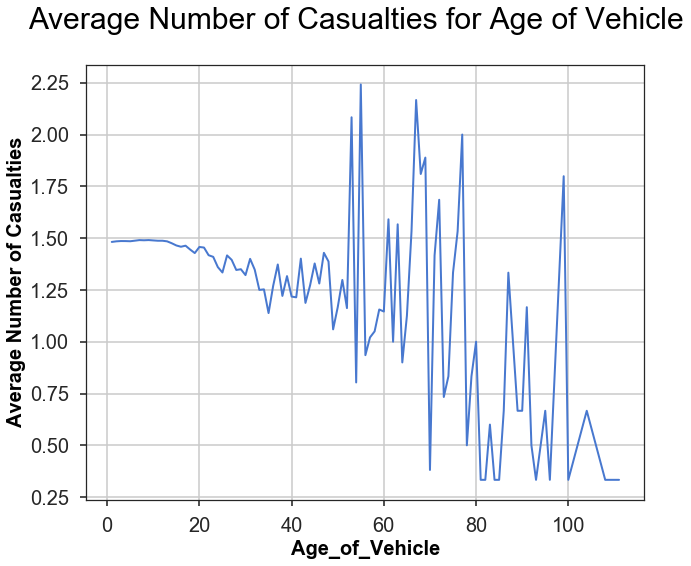

In [22]:
num_casualties_plt = num_casualties.plot(kind='line', legend=False, figsize=(10,8))
num_casualties_plt.set_ylabel("Average Number of Casualties")
plt.suptitle('Average Number of Casualties for Age of Vehicle', fontsize=30)
plt.show()

# 5. Are accidents more severe in older vehicles?

* Below you can see the comparison between the % of fatal, serious and slight accidents for the different vehicle ages.
* Again we are considering an "old" vehicle to be one which is 10 years and older.
* You can see that "older" vehicles have a lot more fatal accidents in comparison to "newer" vehicles with ~75 year old vehicles having the most. Again, you can see that "older" vehicles are involved in more serious accidents but both "old" and "new" have a high % of slight accidents overall.

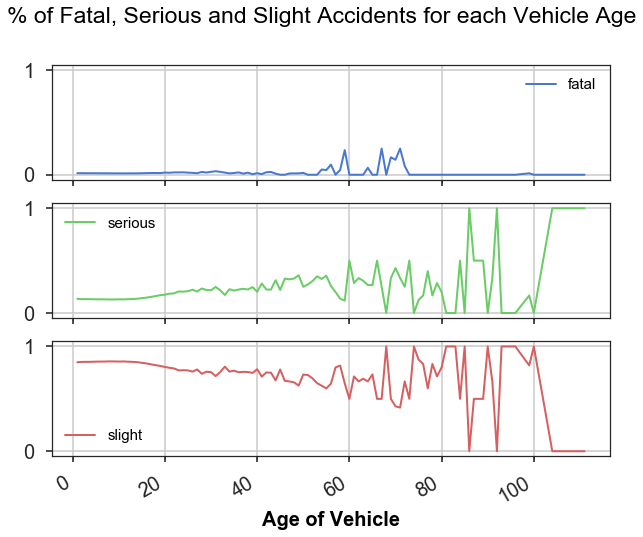

In [23]:
accident_severity.plot(subplots=True, sharey=True, figsize=(10,8))
plt.xlabel('Age of Vehicle')
plt.suptitle('% of Fatal, Serious and Slight Accidents for each Vehicle Age')
plt.show()

# 6. Are newer vehicles safer in rainy weather conditions?

* The following graph shows the % of fatal/serious/slight accidents in a given "rainy" weather condition. 
* Overall, older vehicles have a higher % of accidents rainy weather conditions in comparison to newer vehciles.
* However, while newer vehicles have a much lower % of fatal and serious accidents overall they still have a high % of slight accidents.

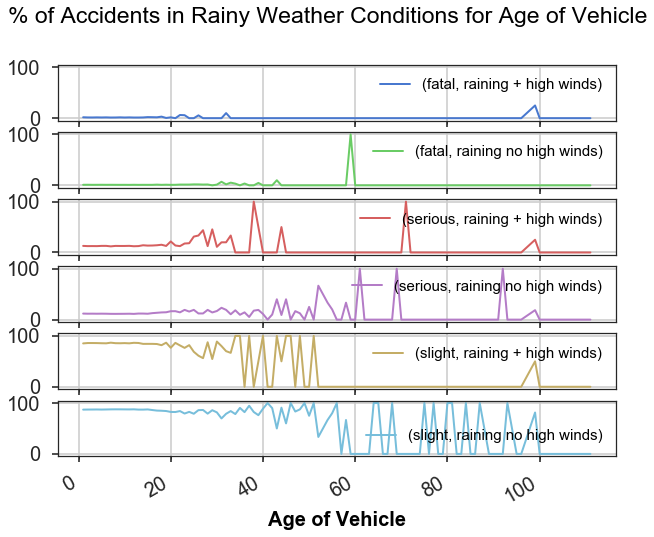

In [25]:
all_rain_analysis.plot(subplots=True, sharey=True, figsize=(10,8))
plt.xlabel('Age of Vehicle')
plt.suptitle('% of Accidents in Rainy Weather Conditions for Age of Vehicle')
plt.show()

# 7. How did the introduction of modern technologies influence road safety?

First, we deiciede to look at the number of accidents over the years between 1993 and 2016. You can see in the following graph that there is a decline in the number of accidents in recent years suggesting that perhaps new technologies have caused there to be less accidents overall.

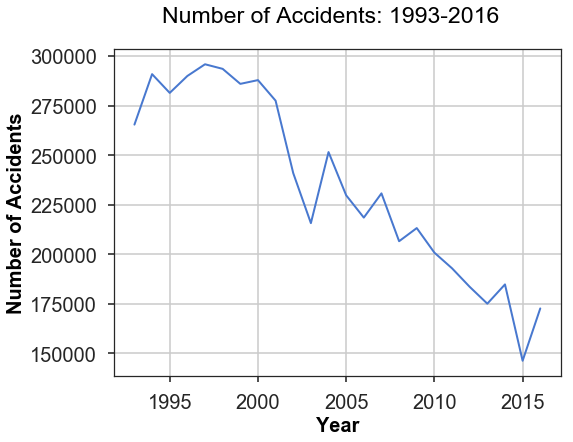

In [26]:
num_accidents_in_each_annual_year.plot(figsize=(8,6), legend=False)
plt.suptitle('Number of Accidents: 1993-2016')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

As a result of this finding we decided to look at a some safety features of vehicles and see if they improved the severity of accidents.

## 7.1
## Airbags
* Firstly, we decided to look at airbags which became a compulsory feature in the EU in 2004.
* In the following graph you can see that after 2004 there is hardly any decline in the number of fatal accidents and an extremely slight decline in the number of serious accidents. 
* Interestingly, there is a noticeable decline in the number of slight accidents which we suspect is due to a combination of other modern technologies as opposed to airbags alone.

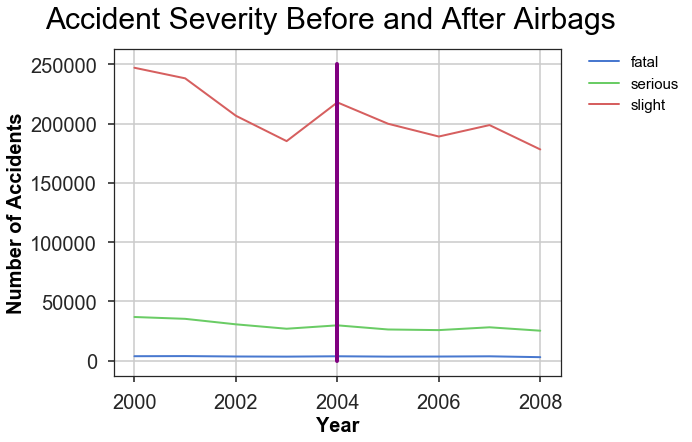

In [27]:
airbags_plt = sub_airbags_accident_severity.plot(kind='line',legend=True, figsize=(8,6))
airbags_plt.set_ylabel("Number of Accidents")
plt.suptitle('Accident Severity Before and After Airbags', fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([2004,2004], [0, 250000], linewidth=4, color='purple')
plt.show()

## 7.2
## AEB Brakes
Next, we decided to look at Autonomous Emergency Braking (AEB) which started to become a new feature in vehicles in 2010.

Again, you can see that there is a decline in the number of slight accidents but nearly no change in the number of fatal and serious accidents.

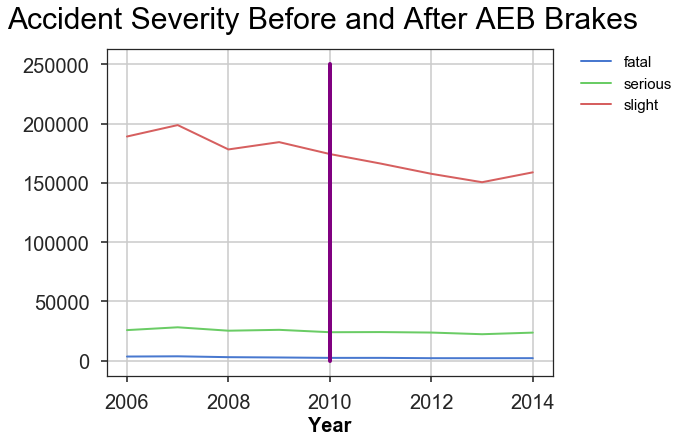

In [31]:
AEB_brakes_plt = sub_AEB_accident_severity.plot(kind='line',legend=True, figsize=(8,6))
plt.suptitle('Accident Severity Before and After AEB Brakes', fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([2010,2010], [0, 250000], linewidth=4, color='purple')
plt.show()

# 8. Conclusions: Are newer vehicles safer than older vehicles?

_Note: We are considering an “old” vehicle to be one which is 10 years and older._


* Our data tells us that newer vehicles are involved in more accidents than older vehicles. We find this to be a very surprising as we expected the opposite to this result. We were unable to retrieve data on the number of “new” and “old” vehicles on the UK roads each year which we could use to normalise the data. Therefore, this is a question for future analysis and a concrete conclusion cannot be made.

* We can conclude that on average "newer" vehicles have fewer casualties in an accident than older vehicles. However, we had anticipated that there would be a greater difference between the "new" and "old" vehicles and therefore this is a possible topic for future research.

* Additionally, older vehicles have a lot more fatal accidents in comparison to newer vehicles with ~80 year old vehicles having the most. Likewise, older vehicles are involved in more serious accidents. Therefore, in terms of accident severity we can conclude that accidents are more severe in older vehicles.

* After analysing that accident severity of “new” and “old” vehicles in rainy weather conditions we discovered that overall older vehicles have a higher % of accidents when compared to new vehicles. However, in terms of accident severity older vehicles are involved in more fatal and serious accidents but both old and new have a very high % of slight accidents.

* After looking at the number of accidents before and after airbags became compulsory in the EU in 2004 we can conclude that while there was a noticeable decline in the number of slight accidents there was hardly any noticeable improvement in the number of serious and fatal accidents. Additionally, AEB brakes followed the same trend after they were introduced in 2010. Therefore, perhaps the decline in the number of overall accidents from after 2004 is due to other modern features and technologies.